# 2.4 Least Squares

An interactive summary of Section 2.4 in __Discrete Inverse and State Estimation Problems__ by Carl Wunsch

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Below we reproduce Figure __2.2__. We generate synthetic data

In [14]:
t = np.arange(50, dtype=np.float64)
mu, sigma = 0, 3 # mean and standard deviation (variance is 9)
n = np.random.normal(mu, sigma, 50)

y = 1 + 2*t + n

The set of observations is written in matrix form:

$
\mathbf{Ex} + \mathbf{n} = \mathbf{y}
$
where $\mathbf{x} = [a \quad b]^T$ (__2.87__).

In [15]:
# Least-square fit of y
E = np.vstack([t, np.ones(len(t))]).T
b, a = np.linalg.lstsq(E, y, rcond=None)[0]
yLSQ = a + b*t

residuals = y - yLSQ

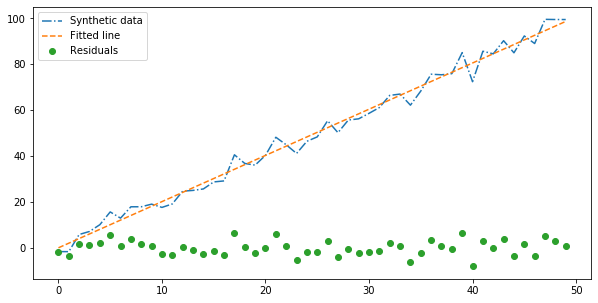

In [16]:
plt.figure(figsize=(10,5))
plt.plot(t, y, '-.', label='Synthetic data', markersize=5)
plt.plot(t, yLSQ, '--', label='Fitted line')
plt.plot(t, residuals, 'o', label='Residuals')
plt.legend()
plt.show()

We minimize the cost/objective/misfit function __2.89__ where $\mathbf{x}_i$ vary independently.

In [5]:
Ex = E@np.transpose( np.array([a, b]) )

J = np.transpose(y - Ex)@(y - Ex)

Since __2.93__ is true, we know that the columns of $\mathbf{E}$ are orthogonal to $\mathbf{n}$. We sovle the normal equations (by brute force below) to find an estimate for $\mathbf{x}$, $\tilde{\mathbf{x}}$, using __2.95__ and recover $\mathbf{x} = [a \quad b]^T$ within machine precision since our example is small compared with real problems.

In [6]:
xEst = np.linalg.inv(np.transpose(E)@E)@np.transpose(E)@y
print(xEst-[b,a])

[0.00000000e+00 3.55271368e-15]


Following the calculations to get to __2.99__, we can show that the residuals, $\tilde{\mathbf{n}}$, are orthogonal to the estimated solution, $\tilde{\mathbf{y}} = \mathbf{E}\tilde{\mathbf{x}}$. 

The estimated solution is the projection of the true solution onto the column space of the model problem, $\mathbf{E}$.

In [7]:
yEst = E@xEst
nEst = y - yEst

print("Showing orthogonailty within machine error:\t", nEst@yEst)
print("Versus the true values of n and y:\t\t", n@y)

Showing orthogonailty within machine error:	 -2.7682744985213503e-11
Versus the true values of n and y:		 -1740.3403214344435


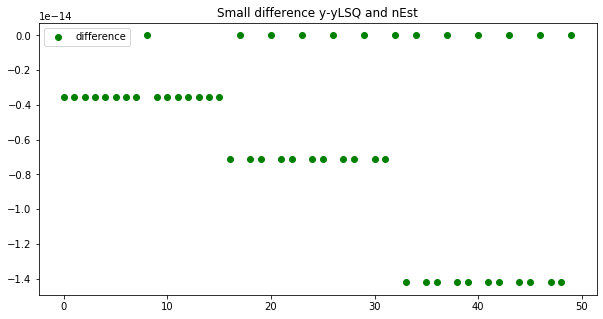

In [8]:
plt.figure(figsize=(10,5))
plt.plot(t, nEst-residuals, 'go', label='difference')
plt.legend()
plt.title("Small difference y-yLSQ and nEst")
plt.show()

Instead of generating synthetic data from a linear relationship, let's use a quadratic rule. We reproduce Figure __2.4__.

In [17]:
t = np.arange(50, dtype=np.float64)
mu, sigma = 0, 30 # mean and standard deviation (variance is 9)
n = np.random.normal(mu, sigma, 50)

y = 1 + t**2 + n

In [18]:
# Least-square fit of y
E = np.vstack([t, np.ones(len(t))]).T
b, a = np.linalg.lstsq(E, y, rcond=None)[0]
yLSQ = a + b*t

residuals = y - yLSQ

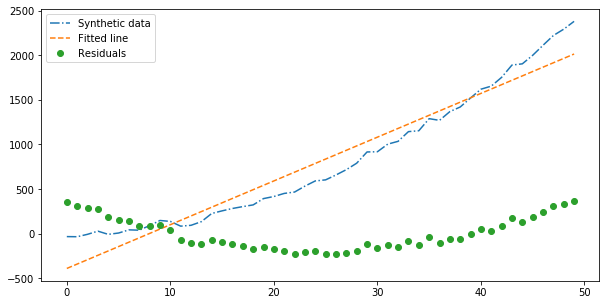

In [19]:
plt.figure(figsize=(10,5))
plt.plot(t, y, '-.', label='Synthetic data', markersize=5)
plt.plot(t, yLSQ, '--', label='Fitted line')
plt.plot(t, residuals, 'o', label='Residuals')
plt.legend()
plt.show()

We see that fitting with a linear rule does not give a good representation of our synthetic data. The estimated noise has non-diagonal covariance?